# HTX Hackathon Use Case - San Francisco Crime Data

Data Source from [Kaggle](https://www.kaggle.com/c/sf-crime)

From 1934 to 1963, San Francisco was infamous for housing some of the world's most notorious criminals on the inescapable island of Alcatraz.

Today, the city is known more for its tech scene than its criminal past. But, with rising wealth inequality, housing shortages, and a proliferation of expensive digital toys riding BART to work, there is no scarcity of crime in the city by the bay.

From Sunset to SOMA, and Marina to Excelsior, this competition's dataset provides nearly 12 years of crime reports from across all of San Francisco's neighborhoods. Given time and location, you must predict the category of crime that occurred.

In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
DATA_DIR = os.path.join(os.environ["HOME"], "Datasets","HTX_Hackathon","San_Francisco_Crimes")

# Read Data

In [3]:
sfcrime = pd.read_csv(os.path.join(DATA_DIR, "SF_Crimes.csv"))
sfcrime.rename(columns = {"X":"LON","Y":"LAT"}, inplace = True)
sfcrime["DayOfWeek"] = sfcrime["DayOfWeek"].str.upper()

display(sfcrime.shape)
display(sfcrime.head(10))

(878049, 9)

,Dates,Category,Descript,DayOfWeek,PdDistrict,Resolution,Address,LON,LAT
0,2015-05-13 23:53:00,WARRANTS,WARRANT ARREST,WEDNESDAY,NORTHERN,"ARREST, BOOKED",OAK ST / LAGUNA ST,-122.425892,37.774599
1,2015-05-13 23:53:00,OTHER OFFENSES,TRAFFIC VIOLATION ARREST,WEDNESDAY,NORTHERN,"ARREST, BOOKED",OAK ST / LAGUNA ST,-122.425892,37.774599
2,2015-05-13 23:33:00,OTHER OFFENSES,TRAFFIC VIOLATION ARREST,WEDNESDAY,NORTHERN,"ARREST, BOOKED",VANNESS AV / GREENWICH ST,-122.424363,37.800414
3,2015-05-13 23:30:00,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,WEDNESDAY,NORTHERN,NONE,1500 Block of LOMBARD ST,-122.426995,37.800873
4,2015-05-13 23:30:00,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,WEDNESDAY,PARK,NONE,100 Block of BRODERICK ST,-122.438738,37.771541
5,2015-05-13 23:30:00,LARCENY/THEFT,GRAND THEFT FROM UNLOCKED AUTO,WEDNESDAY,INGLESIDE,NONE,0 Block of TEDDY AV,-122.403252,37.713431
6,2015-05-13 23:30:00,VEHICLE THEFT,STOLEN AUTOMOBILE,WEDNESDAY,INGLESIDE,NONE,AVALON AV / PERU AV,-122.423327,37.725138
7,2015-05-13 23:30:00,VEHICLE THEFT,STOLEN AUTOMOBILE,WEDNESDAY,BAYVIEW,NONE,KIRKWOOD AV / DONAHUE ST,-122.371274,37.727564
8,2015-05-13 23:00:00,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,WEDNESDAY,RICHMOND,NONE,600 Block of 47TH AV,-122.508194,37.776601
9,2015-05-13 23:00:00,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,WEDNESDAY,CENTRAL,NONE,JEFFERSON ST / LEAVENWORTH ST,-122.419088,37.807802


# Unique Values

In [4]:
def unique_vals(col_name):
    valcnt = sfcrime[col_name].value_counts().reset_index()
    valcnt.columns = [col_name,"Count"]
    return valcnt

In [5]:
unique_vals("Category")

,Category,Count
0,LARCENY/THEFT,174900
1,OTHER OFFENSES,126182
2,NON-CRIMINAL,92304
3,ASSAULT,76876
4,DRUG/NARCOTIC,53971
5,VEHICLE THEFT,53781
6,VANDALISM,44725
7,WARRANTS,42214
8,BURGLARY,36755
9,SUSPICIOUS OCC,31414


In [6]:
unique_vals("Descript")

,Descript,Count
0,GRAND THEFT FROM LOCKED AUTO,60022
1,LOST PROPERTY,31729
2,BATTERY,27441
3,STOLEN AUTOMOBILE,26897
4,"DRIVERS LICENSE, SUSPENDED OR REVOKED",26839
...,...,...
874,ENCOURAGE MINOR TO USE CONTROLLED SUBSTANCE,1
875,"BIGAMY, INCEST, AND THE CRIME AGAINST NATURE (...",1
876,"DISTURBANCE OF NON-RELIGIOUS, NON-POLITICAL AS...",1
877,"CABLE TV CONNECTION OR DECODING DEVICE, UNAUTH...",1


In [7]:
unique_vals("PdDistrict")

,PdDistrict,Count
0,SOUTHERN,157182
1,MISSION,119908
2,NORTHERN,105296
3,BAYVIEW,89431
4,CENTRAL,85460
5,TENDERLOIN,81809
6,INGLESIDE,78845
7,TARAVAL,65596
8,PARK,49313
9,RICHMOND,45209


In [8]:
unique_vals("Resolution")

,Resolution,Count
0,NONE,526790
1,"ARREST, BOOKED",206403
2,"ARREST, CITED",77004
3,LOCATED,17101
4,PSYCHOPATHIC CASE,14534
5,UNFOUNDED,9585
6,JUVENILE BOOKED,5564
7,COMPLAINANT REFUSES TO PROSECUTE,3976
8,DISTRICT ATTORNEY REFUSES TO PROSECUTE,3934
9,NOT PROSECUTED,3714


In [9]:
unique_vals("Address").tail(30)

,Address,Count
23198,CASTLE ST / GREEN ST,1
23199,GREAT HWY / LA PLAYA ST,1
23200,GLADYS ST / SANTAMARINA ST,1
23201,BELLAVISTA WY / DORCAS WY,1
23202,QUANE ST / 21ST ST,1
23203,SANTAYNEZ AV / DELANO AV,1
23204,ULLOA ST / 39TH AV,1
23205,MOULTRIE ST / POWHATTAN AV,1
23206,MONTEREY BL / WESTGATE DR,1
23207,TOMPKINS AV / BRONTE ST,1


# Feature Engineering
## Relabel Categories

In [10]:
RELABEL_CATS = ["SUICIDE",
               "FAMILY OFFENSES",
               "BAD CHECKS",
               "BRIBERY",
               "EXTORTION",
               "SEX OFFENSES NON FORCIBLE",
               "GAMBLING",
               "PORNOGRAPHY/OBSCENE MAT",
               "TREA"]

sfcrime["Category2"] = np.where(sfcrime["Category"].isin(RELABEL_CATS), "OTHERS OFFENSES", sfcrime["Category"])

unique_vals("Category2")

,Category2,Count
0,LARCENY/THEFT,174900
1,OTHER OFFENSES,126182
2,NON-CRIMINAL,92304
3,ASSAULT,76876
4,DRUG/NARCOTIC,53971
5,VEHICLE THEFT,53781
6,VANDALISM,44725
7,WARRANTS,42214
8,BURGLARY,36755
9,SUSPICIOUS OCC,31414


## Building Type

* If Address contains `Block`, it's a building, otherwise, a street
* If Address contains `/`, it's an intersection, `INTERSECTION = 1`

In [11]:
sfcrime["Address"] = sfcrime["Address"].str.upper()
sfcrime["PREMISE"] = np.where(sfcrime["Address"].str.contains("BLOCK"), "BUILDING", "STREET")

sfcrime["PREMISE"].value_counts()

BUILDING    617231
STREET      260818
Name: PREMISE, dtype: int64

In [12]:
sfcrime["Address"] = sfcrime["Address"].str.upper()
sfcrime["INTERSECTION"] = np.where(sfcrime["Address"].str.contains("/"), 1, 0)

sfcrime["INTERSECTION"].value_counts()

0    617231
1    260818
Name: INTERSECTION, dtype: int64

# Date Time Features

In [13]:
sfcrime_df = sfcrime.copy()

sfcrime_df["Dates"] = pd.to_datetime(sfcrime_df["Dates"])
sfcrime_df["DAY_OF_MONTH"] = sfcrime_df["Dates"].dt.day
sfcrime_df["MONTH"] = sfcrime_df["Dates"].dt.month
sfcrime_df["HOUR"] = sfcrime_df["Dates"].dt.hour

display(sfcrime_df.shape)
display(sfcrime_df[["Dates","DAY_OF_MONTH","MONTH","HOUR"]].head())

(878049, 15)

,Dates,DAY_OF_MONTH,MONTH,HOUR
0,2015-05-13 23:53:00,13,5,23
1,2015-05-13 23:53:00,13,5,23
2,2015-05-13 23:33:00,13,5,23
3,2015-05-13 23:30:00,13,5,23
4,2015-05-13 23:30:00,13,5,23


# Geospatial Feature

In [14]:
from h3 import geo_to_h3
sfcrime_geo = sfcrime_df.copy()

sfcrime_geo['HEX_ID'] = [geo_to_h3(lat = x, lng = y, resolution = 10) 
                         for x,y in zip(sfcrime_geo['LAT'], sfcrime_geo['LON'])]

display(sfcrime_geo.shape)
display(sfcrime_geo[["LAT","LON","HEX_ID"]].head())

(878049, 16)

,LAT,LON,HEX_ID
0,37.774599,-122.425892,8a2830828327fff
1,37.774599,-122.425892,8a2830828327fff
2,37.800414,-122.424363,8a283082b3affff
3,37.800873,-122.426995,8a283082b227fff
4,37.771541,-122.438738,8a283082d6c7fff


### Display `Address - Intersection` + `Address - Premise`

In [15]:
display(sfcrime_geo[["Address","INTERSECTION"]].head(10))
display(sfcrime_geo[["Address","PREMISE"]].head(10))

,Address,INTERSECTION
0,OAK ST / LAGUNA ST,1
1,OAK ST / LAGUNA ST,1
2,VANNESS AV / GREENWICH ST,1
3,1500 BLOCK OF LOMBARD ST,0
4,100 BLOCK OF BRODERICK ST,0
5,0 BLOCK OF TEDDY AV,0
6,AVALON AV / PERU AV,1
7,KIRKWOOD AV / DONAHUE ST,1
8,600 BLOCK OF 47TH AV,0
9,JEFFERSON ST / LEAVENWORTH ST,1


,Address,PREMISE
0,OAK ST / LAGUNA ST,STREET
1,OAK ST / LAGUNA ST,STREET
2,VANNESS AV / GREENWICH ST,STREET
3,1500 BLOCK OF LOMBARD ST,BUILDING
4,100 BLOCK OF BRODERICK ST,BUILDING
5,0 BLOCK OF TEDDY AV,BUILDING
6,AVALON AV / PERU AV,STREET
7,KIRKWOOD AV / DONAHUE ST,STREET
8,600 BLOCK OF 47TH AV,BUILDING
9,JEFFERSON ST / LEAVENWORTH ST,STREET


# Write to CSV

In [16]:
sfcrime_geo.to_csv(os.path.join(DATA_DIR, "SF_Crimes_Geo.csv"), index = False)

# Geospatial Visualization
## KeplerGL

In [17]:
config_hex_sfcrime = {u'version': u'v1', 
                      u'config': {u'visState': 
                                  {u'layers': [{u'type': u'hexagonId', u'visualChannels': 
                                                {u'sizeField': {u'type': u'integer', u'name': u'value'}, 
                                                 u'coverageField': None, u'colorScale': u'quantize', u'coverageScale': u'linear', 
                                                 u'colorField': {u'type': u'integer', u'name': u'value'}, u'sizeScale': u'linear'}, 
                                                 u'config': {u'dataId': u'sfcrime_hex_data', u'color': [250, 116, 0], 
                                                            u'textLabel': 
                                                            {u'color': [255, 255, 255], u'field': None, u'size': 20, u'anchor': u'middle', u'offset': [0, 0]}, 
                                                            u'label': u'H3 Hexagon', u'isVisible': True, 
                                                            u'visConfig': {u'coverageRange': [0, 1], 
                                                                           u'opacity': 0.8, u'elevationScale': 30,
                                                                           u'hi-precision': False, u'coverage': 1, u'enable3d': True, 
                                                                           u'sizeRange': [0, 500], 
                                                                           u'colorRange': {u'category': u'Uber', u'type': u'sequential', 
                                                                                           u'colors': [u'#194266', 
                                                                                                       u'#355C7D', 
                                                                                                       u'#63617F', 
                                                                                                       u'#916681', 
                                                                                                       u'#C06C84', 
                                                                                                       u'#D28389', 
                                                                                                       u'#E59A8F', 
                                                                                                       u'#F8B195'], 
                                                                                           u'reversed': False, u'name': u'Sunrise 8'}}, 
                                                            u'columns': {u'hex_id': u'hex_id'}}, u'id': u'jdys7lp'}], 
                                   u'interactionConfig': {u'brush': {u'enabled': False, u'size': 0.5}, 
                                                          u'tooltip': {u'fieldsToShow': {u'volcano_hex_data': [u'hex_id', u'value']}, u'enabled': True}}, 
                                   u'splitMaps': [], u'layerBlending': u'normal', u'filters': []}, 
                                   u'mapState': {u'bearing': 2.6192893401015205, u'dragRotate': True, u'zoom': 10, u'longitude': -122.446747, 
                                                 u'isSplit': False, u'pitch': 37.374216241015446, u'latitude':37.733795}, 
                                   u'mapStyle': {u'mapStyles': {}, u'topLayerGroups': {}, u'styleType': u'dark', 
                                                u'visibleLayerGroups': {u'building': True, 
                                                                        u'land': True, 
                                                                        u'3d building': False, 
                                                                        u'label': True, 
                                                                        u'water': True, 
                                                                        u'border': False, 
                                                                        u'road': True}}}}

# Visualization with KeplerGL
Aggregate by `HEX_ID`, which means count the number of crimes per hex

In [18]:
hex_sfcrime = sfcrime_geo.copy()

hex_sfcrime["CNT"] = 1
# aggregate by hex_id
hex_sfcrime_aggr = hex_sfcrime.groupby(by = ["HEX_ID"], as_index=False) \
    .agg({"CNT":np.sum})

hex_sfcrime_aggr.columns = ["HEX_ID","HEX_CNT"]

# join the data back
hex_sfcrime_joined = hex_sfcrime.merge(hex_sfcrime_aggr, how = "inner",
                                       left_on = "HEX_ID", right_on="HEX_ID")

display(hex_sfcrime_joined.shape)
display(hex_sfcrime_joined.head(10))

(878049, 18)

,Dates,Category,Descript,DayOfWeek,PdDistrict,Resolution,Address,LON,LAT,Category2,PREMISE,INTERSECTION,DAY_OF_MONTH,MONTH,HOUR,HEX_ID,CNT,HEX_CNT
0,2015-05-13 23:53:00,WARRANTS,WARRANT ARREST,WEDNESDAY,NORTHERN,"ARREST, BOOKED",OAK ST / LAGUNA ST,-122.425892,37.774599,WARRANTS,STREET,1,13,5,23,8a2830828327fff,1,193
1,2015-05-13 23:53:00,OTHER OFFENSES,TRAFFIC VIOLATION ARREST,WEDNESDAY,NORTHERN,"ARREST, BOOKED",OAK ST / LAGUNA ST,-122.425892,37.774599,OTHER OFFENSES,STREET,1,13,5,23,8a2830828327fff,1,193
2,2015-04-18 13:30:00,SECONDARY CODES,DOMESTIC VIOLENCE,SATURDAY,NORTHERN,NONE,FELL ST / LAGUNA ST,-122.426071,37.775524,SECONDARY CODES,STREET,1,18,4,13,8a2830828327fff,1,193
3,2015-04-18 13:30:00,VANDALISM,"MALICIOUS MISCHIEF, VANDALISM OF VEHICLES",SATURDAY,NORTHERN,NONE,FELL ST / LAGUNA ST,-122.426071,37.775524,VANDALISM,STREET,1,18,4,13,8a2830828327fff,1,193
4,2015-03-08 08:50:00,OTHER OFFENSES,"DRIVERS LICENSE, SUSPENDED OR REVOKED",SUNDAY,NORTHERN,"ARREST, BOOKED",OAK ST / LAGUNA ST,-122.425892,37.774599,OTHER OFFENSES,STREET,1,8,3,8,8a2830828327fff,1,193
5,2015-01-21 23:15:00,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,WEDNESDAY,NORTHERN,NONE,LAGUNA ST / FELL ST,-122.426071,37.775524,LARCENY/THEFT,STREET,1,21,1,23,8a2830828327fff,1,193
6,2015-01-05 20:00:00,LARCENY/THEFT,GRAND THEFT FROM UNLOCKED AUTO,MONDAY,NORTHERN,NONE,OAK ST / LAGUNA ST,-122.425892,37.774599,LARCENY/THEFT,STREET,1,5,1,20,8a2830828327fff,1,193
7,2014-08-19 17:00:00,VANDALISM,"MALICIOUS MISCHIEF, VANDALISM OF VEHICLES",TUESDAY,NORTHERN,NONE,FELL ST / LAGUNA ST,-122.426071,37.775524,VANDALISM,STREET,1,19,8,17,8a2830828327fff,1,193
8,2014-06-29 17:12:00,DRUG/NARCOTIC,POSSESSION OF MARIJUANA,SUNDAY,NORTHERN,"ARREST, CITED",OAK ST / LAGUNA ST,-122.425892,37.774599,DRUG/NARCOTIC,STREET,1,29,6,17,8a2830828327fff,1,193
9,2014-06-29 17:12:00,OTHER OFFENSES,TRAFFIC VIOLATION ARREST,SUNDAY,NORTHERN,"ARREST, CITED",OAK ST / LAGUNA ST,-122.425892,37.774599,OTHER OFFENSES,STREET,1,29,6,17,8a2830828327fff,1,193


In [19]:
hex_sfcrime_kepler = hex_sfcrime_joined[['HEX_ID','HEX_CNT','Address','LAT','LON']].copy()
hex_sfcrime_kepler.columns = ['hex_id','value','Address','latitude','longitude']

hex_sfcrime_kepler.drop_duplicates(subset=['hex_id','value'], inplace = True)

display(hex_sfcrime_kepler.head())

import keplergl
hexmap = keplergl.KeplerGl(height = 600,
                           data = {"sfcrime_hex_data": hex_sfcrime_kepler},
                           config = config_hex_sfcrime)

hexmap.save_to_html(file_name = 'hexmap_sfcrime.html',
                    data = {"sfcrime_hex_data": hex_sfcrime_kepler},
                    config = config_hex_sfcrime)
# hexmap

,hex_id,value,Address,latitude,longitude
0,8a2830828327fff,193,OAK ST / LAGUNA ST,37.774599,-122.425892
193,8a283082b3affff,138,VANNESS AV / GREENWICH ST,37.800414,-122.424363
331,8a283082b227fff,191,1500 BLOCK OF LOMBARD ST,37.800873,-122.426995
522,8a283082d6c7fff,166,100 BLOCK OF BRODERICK ST,37.771541,-122.438738
688,8a28309564dffff,125,0 BLOCK OF TEDDY AV,37.713431,-122.403252


User Guide: https://docs.kepler.gl/docs/keplergl-jupyter
Map saved to hexmap_sfcrime.html!


# Crime Hotspot Detection

Group by `HEX_ID` and `Category` then Count

In [20]:
hotspot = hex_sfcrime_joined[["HEX_ID","Category"]].copy()
hotspot = hotspot.loc[hotspot["Category"] != "NON-CRIMINAL"]
hotspot["COUNT"] = 1

hotspot = hotspot.groupby(by = ["HEX_ID","Category"], as_index = False) \
          .agg({"COUNT": np.sum})

display(hotspot.head(10))

,HEX_ID,Category,COUNT
0,8a0326233ab7fff,ASSAULT,4
1,8a0326233ab7fff,BURGLARY,1
2,8a0326233ab7fff,DISORDERLY CONDUCT,2
3,8a0326233ab7fff,LARCENY/THEFT,15
4,8a0326233ab7fff,OTHER OFFENSES,17
5,8a0326233ab7fff,ROBBERY,1
6,8a0326233ab7fff,SEX OFFENSES FORCIBLE,1
7,8a0326233ab7fff,STOLEN PROPERTY,1
8,8a0326233ab7fff,SUSPICIOUS OCC,2
9,8a0326233ab7fff,TRESPASS,1


In [21]:
hotspot_df = hotspot.loc[hotspot["Category"] != "NON-CRIMINAL"]

display(hotspot_df.shape)
display(hotspot_df.head(10))

(79418, 3)

,HEX_ID,Category,COUNT
0,8a0326233ab7fff,ASSAULT,4
1,8a0326233ab7fff,BURGLARY,1
2,8a0326233ab7fff,DISORDERLY CONDUCT,2
3,8a0326233ab7fff,LARCENY/THEFT,15
4,8a0326233ab7fff,OTHER OFFENSES,17
5,8a0326233ab7fff,ROBBERY,1
6,8a0326233ab7fff,SEX OFFENSES FORCIBLE,1
7,8a0326233ab7fff,STOLEN PROPERTY,1
8,8a0326233ab7fff,SUSPICIOUS OCC,2
9,8a0326233ab7fff,TRESPASS,1


If `COUNT > 1`, `REPEAT = 1`, otherwise `REPEAT = 0`

In [22]:
hotspot_df["REPEAT"] = np.where(hotspot_df["COUNT"] > 1, 1, 0)

display(hotspot_df.shape)
display(hotspot_df.head(10))

(79418, 4)

,HEX_ID,Category,COUNT,REPEAT
0,8a0326233ab7fff,ASSAULT,4,1
1,8a0326233ab7fff,BURGLARY,1,0
2,8a0326233ab7fff,DISORDERLY CONDUCT,2,1
3,8a0326233ab7fff,LARCENY/THEFT,15,1
4,8a0326233ab7fff,OTHER OFFENSES,17,1
5,8a0326233ab7fff,ROBBERY,1,0
6,8a0326233ab7fff,SEX OFFENSES FORCIBLE,1,0
7,8a0326233ab7fff,STOLEN PROPERTY,1,0
8,8a0326233ab7fff,SUSPICIOUS OCC,2,1
9,8a0326233ab7fff,TRESPASS,1,0


Number of Crimes with Repeating Occurrences

In [23]:
hexid_repeat = hotspot_df.copy()
hexid_repeat = hexid_repeat.groupby(by = ["HEX_ID"], as_index = False) \
                 .agg({"REPEAT": np.sum})

display(hexid_repeat.shape)
display(hexid_repeat.head(10))

(5886, 2)

,HEX_ID,REPEAT
0,8a0326233ab7fff,7
1,8a283080168ffff,20
2,8a28308016affff,24
3,8a283080c807fff,10
4,8a283080c80ffff,4
5,8a283080c827fff,9
6,8a283080c82ffff,12
7,8a283080c837fff,3
8,8a283080c847fff,10
9,8a283080c84ffff,6


(array([8.410e+02, 1.626e+03, 1.266e+03, 1.111e+03, 5.070e+02, 3.400e+02,
        1.290e+02, 5.600e+01, 9.000e+00, 1.000e+00]),
 array([ 0. ,  3.6,  7.2, 10.8, 14.4, 18. , 21.6, 25.2, 28.8, 32.4, 36. ]),
 <BarContainer object of 10 artists>)

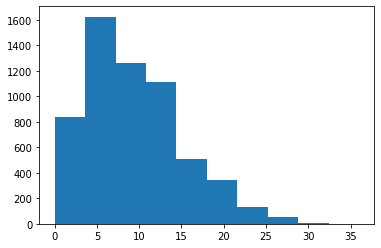

In [24]:
plt.hist(hexid_repeat["REPEAT"])

If Number of Repeating Crimes >= 20, `HOTSPOT = 1`

In [25]:
hexid_repeat["HOTSPOT"] = np.where(hexid_repeat["REPEAT"] >= 20, 1, 0)

hexid_repeat["HOTSPOT"].value_counts()

0    5549
1     337
Name: HOTSPOT, dtype: int64

In [26]:
337/(337+5549)

0.057254502208630646

## Rejoin Data

In [27]:
hex_sfcrime_hotspot = hex_sfcrime_joined.copy()

hex_sfcrime_hotspot = hex_sfcrime_hotspot.merge(hexid_repeat, how = "left",
                                               left_on = "HEX_ID", right_on = "HEX_ID")

hex_sfcrime_hotspot["HOTSPOT"].fillna(0, inplace = True)

hex_sfcrime_hotspot["HOTSPOT"] = hex_sfcrime_hotspot["HOTSPOT"].astype('int8')

display(hex_sfcrime_hotspot["HOTSPOT"].value_counts())
display(hex_sfcrime_hotspot.shape)
display(hex_sfcrime_hotspot.head(10))

0    501267
1    376782
Name: HOTSPOT, dtype: int64

(878049, 20)

,Dates,Category,Descript,DayOfWeek,PdDistrict,Resolution,Address,LON,LAT,Category2,PREMISE,INTERSECTION,DAY_OF_MONTH,MONTH,HOUR,HEX_ID,CNT,HEX_CNT,REPEAT,HOTSPOT
0,2015-05-13 23:53:00,WARRANTS,WARRANT ARREST,WEDNESDAY,NORTHERN,"ARREST, BOOKED",OAK ST / LAGUNA ST,-122.425892,37.774599,WARRANTS,STREET,1,13,5,23,8a2830828327fff,1,193,11.0,0
1,2015-05-13 23:53:00,OTHER OFFENSES,TRAFFIC VIOLATION ARREST,WEDNESDAY,NORTHERN,"ARREST, BOOKED",OAK ST / LAGUNA ST,-122.425892,37.774599,OTHER OFFENSES,STREET,1,13,5,23,8a2830828327fff,1,193,11.0,0
2,2015-04-18 13:30:00,SECONDARY CODES,DOMESTIC VIOLENCE,SATURDAY,NORTHERN,NONE,FELL ST / LAGUNA ST,-122.426071,37.775524,SECONDARY CODES,STREET,1,18,4,13,8a2830828327fff,1,193,11.0,0
3,2015-04-18 13:30:00,VANDALISM,"MALICIOUS MISCHIEF, VANDALISM OF VEHICLES",SATURDAY,NORTHERN,NONE,FELL ST / LAGUNA ST,-122.426071,37.775524,VANDALISM,STREET,1,18,4,13,8a2830828327fff,1,193,11.0,0
4,2015-03-08 08:50:00,OTHER OFFENSES,"DRIVERS LICENSE, SUSPENDED OR REVOKED",SUNDAY,NORTHERN,"ARREST, BOOKED",OAK ST / LAGUNA ST,-122.425892,37.774599,OTHER OFFENSES,STREET,1,8,3,8,8a2830828327fff,1,193,11.0,0
5,2015-01-21 23:15:00,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,WEDNESDAY,NORTHERN,NONE,LAGUNA ST / FELL ST,-122.426071,37.775524,LARCENY/THEFT,STREET,1,21,1,23,8a2830828327fff,1,193,11.0,0
6,2015-01-05 20:00:00,LARCENY/THEFT,GRAND THEFT FROM UNLOCKED AUTO,MONDAY,NORTHERN,NONE,OAK ST / LAGUNA ST,-122.425892,37.774599,LARCENY/THEFT,STREET,1,5,1,20,8a2830828327fff,1,193,11.0,0
7,2014-08-19 17:00:00,VANDALISM,"MALICIOUS MISCHIEF, VANDALISM OF VEHICLES",TUESDAY,NORTHERN,NONE,FELL ST / LAGUNA ST,-122.426071,37.775524,VANDALISM,STREET,1,19,8,17,8a2830828327fff,1,193,11.0,0
8,2014-06-29 17:12:00,DRUG/NARCOTIC,POSSESSION OF MARIJUANA,SUNDAY,NORTHERN,"ARREST, CITED",OAK ST / LAGUNA ST,-122.425892,37.774599,DRUG/NARCOTIC,STREET,1,29,6,17,8a2830828327fff,1,193,11.0,0
9,2014-06-29 17:12:00,OTHER OFFENSES,TRAFFIC VIOLATION ARREST,SUNDAY,NORTHERN,"ARREST, CITED",OAK ST / LAGUNA ST,-122.425892,37.774599,OTHER OFFENSES,STREET,1,29,6,17,8a2830828327fff,1,193,11.0,0


# Remove Columns and Write to CSV

In [28]:
hex_sfcrime_hotspot = hex_sfcrime_hotspot.drop(columns = ["Resolution","Address","PREMISE",
                                                         "CNT","HEX_CNT","REPEAT"])

hex_sfcrime_hotspot.to_csv(os.path.join(DATA_DIR, "SF_Crime_Hotspot.csv"), index = False)

display(hex_sfcrime_hotspot.shape)
display(hex_sfcrime_hotspot.head(10))

(878049, 14)

,Dates,Category,Descript,DayOfWeek,PdDistrict,LON,LAT,Category2,INTERSECTION,DAY_OF_MONTH,MONTH,HOUR,HEX_ID,HOTSPOT
0,2015-05-13 23:53:00,WARRANTS,WARRANT ARREST,WEDNESDAY,NORTHERN,-122.425892,37.774599,WARRANTS,1,13,5,23,8a2830828327fff,0
1,2015-05-13 23:53:00,OTHER OFFENSES,TRAFFIC VIOLATION ARREST,WEDNESDAY,NORTHERN,-122.425892,37.774599,OTHER OFFENSES,1,13,5,23,8a2830828327fff,0
2,2015-04-18 13:30:00,SECONDARY CODES,DOMESTIC VIOLENCE,SATURDAY,NORTHERN,-122.426071,37.775524,SECONDARY CODES,1,18,4,13,8a2830828327fff,0
3,2015-04-18 13:30:00,VANDALISM,"MALICIOUS MISCHIEF, VANDALISM OF VEHICLES",SATURDAY,NORTHERN,-122.426071,37.775524,VANDALISM,1,18,4,13,8a2830828327fff,0
4,2015-03-08 08:50:00,OTHER OFFENSES,"DRIVERS LICENSE, SUSPENDED OR REVOKED",SUNDAY,NORTHERN,-122.425892,37.774599,OTHER OFFENSES,1,8,3,8,8a2830828327fff,0
5,2015-01-21 23:15:00,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,WEDNESDAY,NORTHERN,-122.426071,37.775524,LARCENY/THEFT,1,21,1,23,8a2830828327fff,0
6,2015-01-05 20:00:00,LARCENY/THEFT,GRAND THEFT FROM UNLOCKED AUTO,MONDAY,NORTHERN,-122.425892,37.774599,LARCENY/THEFT,1,5,1,20,8a2830828327fff,0
7,2014-08-19 17:00:00,VANDALISM,"MALICIOUS MISCHIEF, VANDALISM OF VEHICLES",TUESDAY,NORTHERN,-122.426071,37.775524,VANDALISM,1,19,8,17,8a2830828327fff,0
8,2014-06-29 17:12:00,DRUG/NARCOTIC,POSSESSION OF MARIJUANA,SUNDAY,NORTHERN,-122.425892,37.774599,DRUG/NARCOTIC,1,29,6,17,8a2830828327fff,0
9,2014-06-29 17:12:00,OTHER OFFENSES,TRAFFIC VIOLATION ARREST,SUNDAY,NORTHERN,-122.425892,37.774599,OTHER OFFENSES,1,29,6,17,8a2830828327fff,0
